In [3]:
# import Numpy and Pandas
import numpy as np
import pandas as pd

# for reading and displaying images, import imread and matplotlib

import matplotlib.pyplot as plt
# for creating validation set, import train_test_split; understand how the function works

# for evaluating the model, import accuracy_score from sklearn

# Import necessary PyTorch libraries and modules
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
# Import dataset from pytorch vision - Fashion MNIST
composed = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))
                                ])
train_data = torchvision.datasets.FashionMNIST(root='/.data',train=True,transform=composed,download=True)
test_data = torchvision.datasets.FashionMNIST(root='/.data',train=False,transform=composed)

In [21]:
batch_size = 40
num_epoch = 10
learning_rate =0.002

In [5]:
train_load = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=test_data,batch_size=100,shuffle=True)


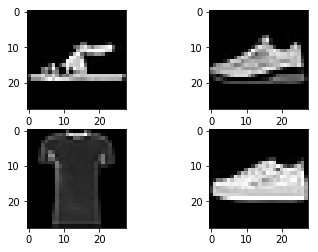

In [53]:
a = next(iter(train_load))
x ,labels = a
i=0
for y in x:
    if i==4:
        break
    plt.subplot(2,2,i+1)
    plt.imshow(y[0],cmap="gray")
    i+=1
    

In [19]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*5*5,250)
        self.fc2 = nn.Linear(250,120)
        self.fc3 = nn.Linear(120,10)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [20]:
model = Model()

    # defining the optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    # defining the loss function
criterion = nn.CrossEntropyLoss()  

In [22]:
for epoch in range(num_epoch):
    for i,(a,b) in enumerate(train_load):
        optimizer.zero_grad()
        y_predicted = model.forward(a)
        loss = criterion(y_predicted,b)
        
        # clear the gradients
        loss.backward()
        optimizer.step()
        # compute the model output
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        # propagate loss backwards
        # update model weights
        if i%1000==0:
            print("loss:{0} i is {1}".format(loss.item(),i))
    print('='*50)   

loss:2.317331075668335 i is 0
loss:0.3487008213996887 i is 1000
loss:0.1867346465587616 i is 0
loss:0.34079909324645996 i is 1000
loss:0.385671466588974 i is 0
loss:0.3469357192516327 i is 1000
loss:0.24341507256031036 i is 0
loss:0.5480212569236755 i is 1000
loss:0.2983965575695038 i is 0
loss:0.33680540323257446 i is 1000
loss:0.32513427734375 i is 0
loss:0.0952734425663948 i is 1000
loss:0.396161288022995 i is 0
loss:0.4343349039554596 i is 1000
loss:0.33286845684051514 i is 0
loss:0.17386282980442047 i is 1000
loss:0.15085747838020325 i is 0
loss:0.12979158759117126 i is 1000
loss:0.23932230472564697 i is 0
loss:0.19333665072917938 i is 1000


In [23]:
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_load:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print((100*correct)/total)

89.18


In [24]:
a = next(iter(test_load))


In [25]:
tr = a[1]
tr = tr[:2]
tr

tensor([8, 1])

In [26]:
pred = a[0]

In [27]:
pred = pred[:2]

In [28]:
pred.shape

torch.Size([2, 1, 28, 28])

In [31]:
a = model(pred)

In [32]:
_,y = torch.max(a,1)

In [33]:
classes =["T-shirt/top"
, "Trouser"
, "Pullover"
, "Dress"
, "Coat"
, "Sanda"
, "Shirt"
, "Sneake"
, "Bag"
, "Ankle boot"]

In [34]:
classes[tr[0]]

'Bag'

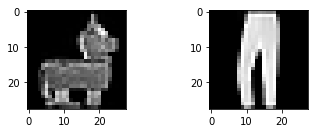

In [35]:
i=1
for x in pred:
    plt.subplot(2,2,i)
    i+=1
    x=x[0]
    plt.imshow(x,cmap="gray")
    

In [36]:
#Actual
classes[tr[0]]

'Bag'

In [37]:
classes[tr[1]]

'Trouser'

In [ ]:
y